### **Ejercicios Planteados**

Para esta sección, siga los pasos para crear la clasificación:

In [2]:
#Importamos las librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage, inconsistent
from scipy.spatial.distance import cdist

### 1. Para un grupo de datos simulados, use la siguiente función:

In [3]:
def plot_dendrogram(model, **kwargs):
'''
Esta función extrae la información de un modelo AgglomerativeClustering
y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
'''
counts = np.zeros(model.children_.shape[0])
n_samples = len(model.labels_)
for i, merge in enumerate(model.children_):
current_count = 0
for child_idx in merge:
if child_idx < n_samples:
current_count += 1 # leaf node
else:
current_count += counts[child_idx - n_samples]
counts[i] = current_count

linkage_matrix = np.column_stack([model.children_, model.distances_,
counts]).astype(float)

# Plot
dendrogram(linkage_matrix, **kwargs)

IndentationError: expected an indented block after function definition on line 1 (<ipython-input-3-269d6ae3944c>, line 2)

In [4]:
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot
    dendrogram(linkage_matrix, **kwargs)

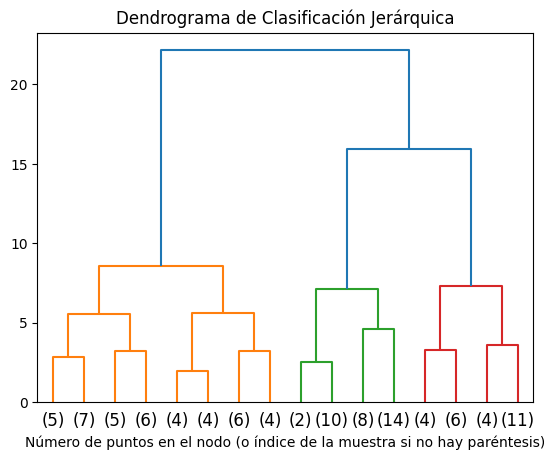

In [5]:
# Generar datos ficticios
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=0)

# Ajustar el modelo de agrupamiento jerárquico
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)

# Graficar el dendrograma
plt.title('Dendrograma de Clasificación Jerárquica')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Número de puntos en el nodo (o índice de la muestra si no hay paréntesis)")
plt.show()

### 2. Para la siguiente clasificación construya un dendrograma, con distintas métricas.

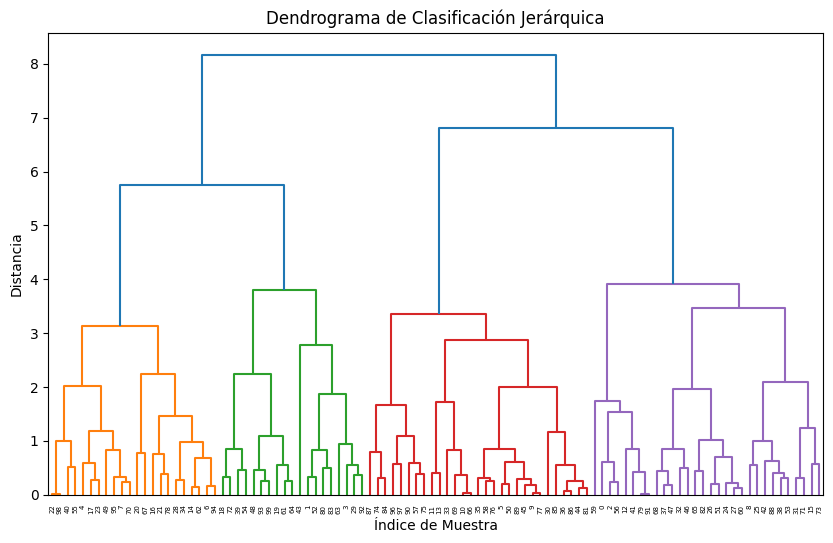

In [6]:
# Use a different affinity (distance metric)
Z = linkage(X, method='complete', metric='euclidean')

# Calculate the inconsistency values
depth = 5
incons = inconsistent(Z, depth)


# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrograma de Clasificación Jerárquica')
plt.xlabel('Índice de Muestra')
plt.ylabel('Distancia')
plt.show()

### 3. Establezca el k adecuado para estos datos.

### 4. Tome la decisión por medio de “índices silhouette”

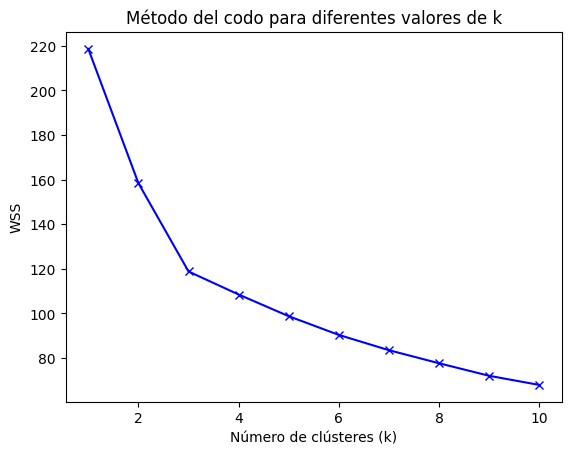

El número óptimo de clústeres es 10


In [7]:
# Rango de valores de k a probar
k_values = range(1, 11)

# Para cada valor de k, ajusta un modelo y calcula el WSS
wss_values = []
for k in k_values:
    model = AgglomerativeClustering(n_clusters=k)
    labels = model.fit_predict(X)
    # Calcula los centros de cada clúster
    centers = [np.mean(X[labels == i], axis=0) for i in range(k)]
    # Calcula la suma de las distancias al cuadrado de cada punto a su centro de clúster
    wss = sum(np.min(cdist(X, centers, 'euclidean'), axis=1))
    wss_values.append(wss)

# Grafica los valores de WSS
plt.plot(k_values, wss_values, 'bx-')
plt.title('Método del codo para diferentes valores de k')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('WSS')  # suma de cuadrados dentro del clúster
plt.show()

# Imprime el número óptimo de clústeres
optimal_k = k_values[wss_values.index(min(wss_values))]
print(f"El número óptimo de clústeres es {optimal_k}")